## Assignment 3
### Question 1: Implement k-Nearest Neighbor algorithm for classifying a heart dataset.
### Link: https://www.kaggle.com/johnsmith88/heart-disease-dataset

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
dat = df[:]

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
X = df.iloc[:,:-1].values
y= df['target'].values

In [5]:
# Applying Feature scaling to the non-categorical data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,[0,3,4,7,9]]=sc.fit_transform(X[:,[0,3,4,7,9]])

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
missing_cols= [cols for cols in df.columns
              if df[cols].isnull().any()]
missing_cols

[]

### So there are no missing values in the database

In [10]:
# Splitting the dataset 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Visualisation

C:\Users\SAHIL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\SAHIL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


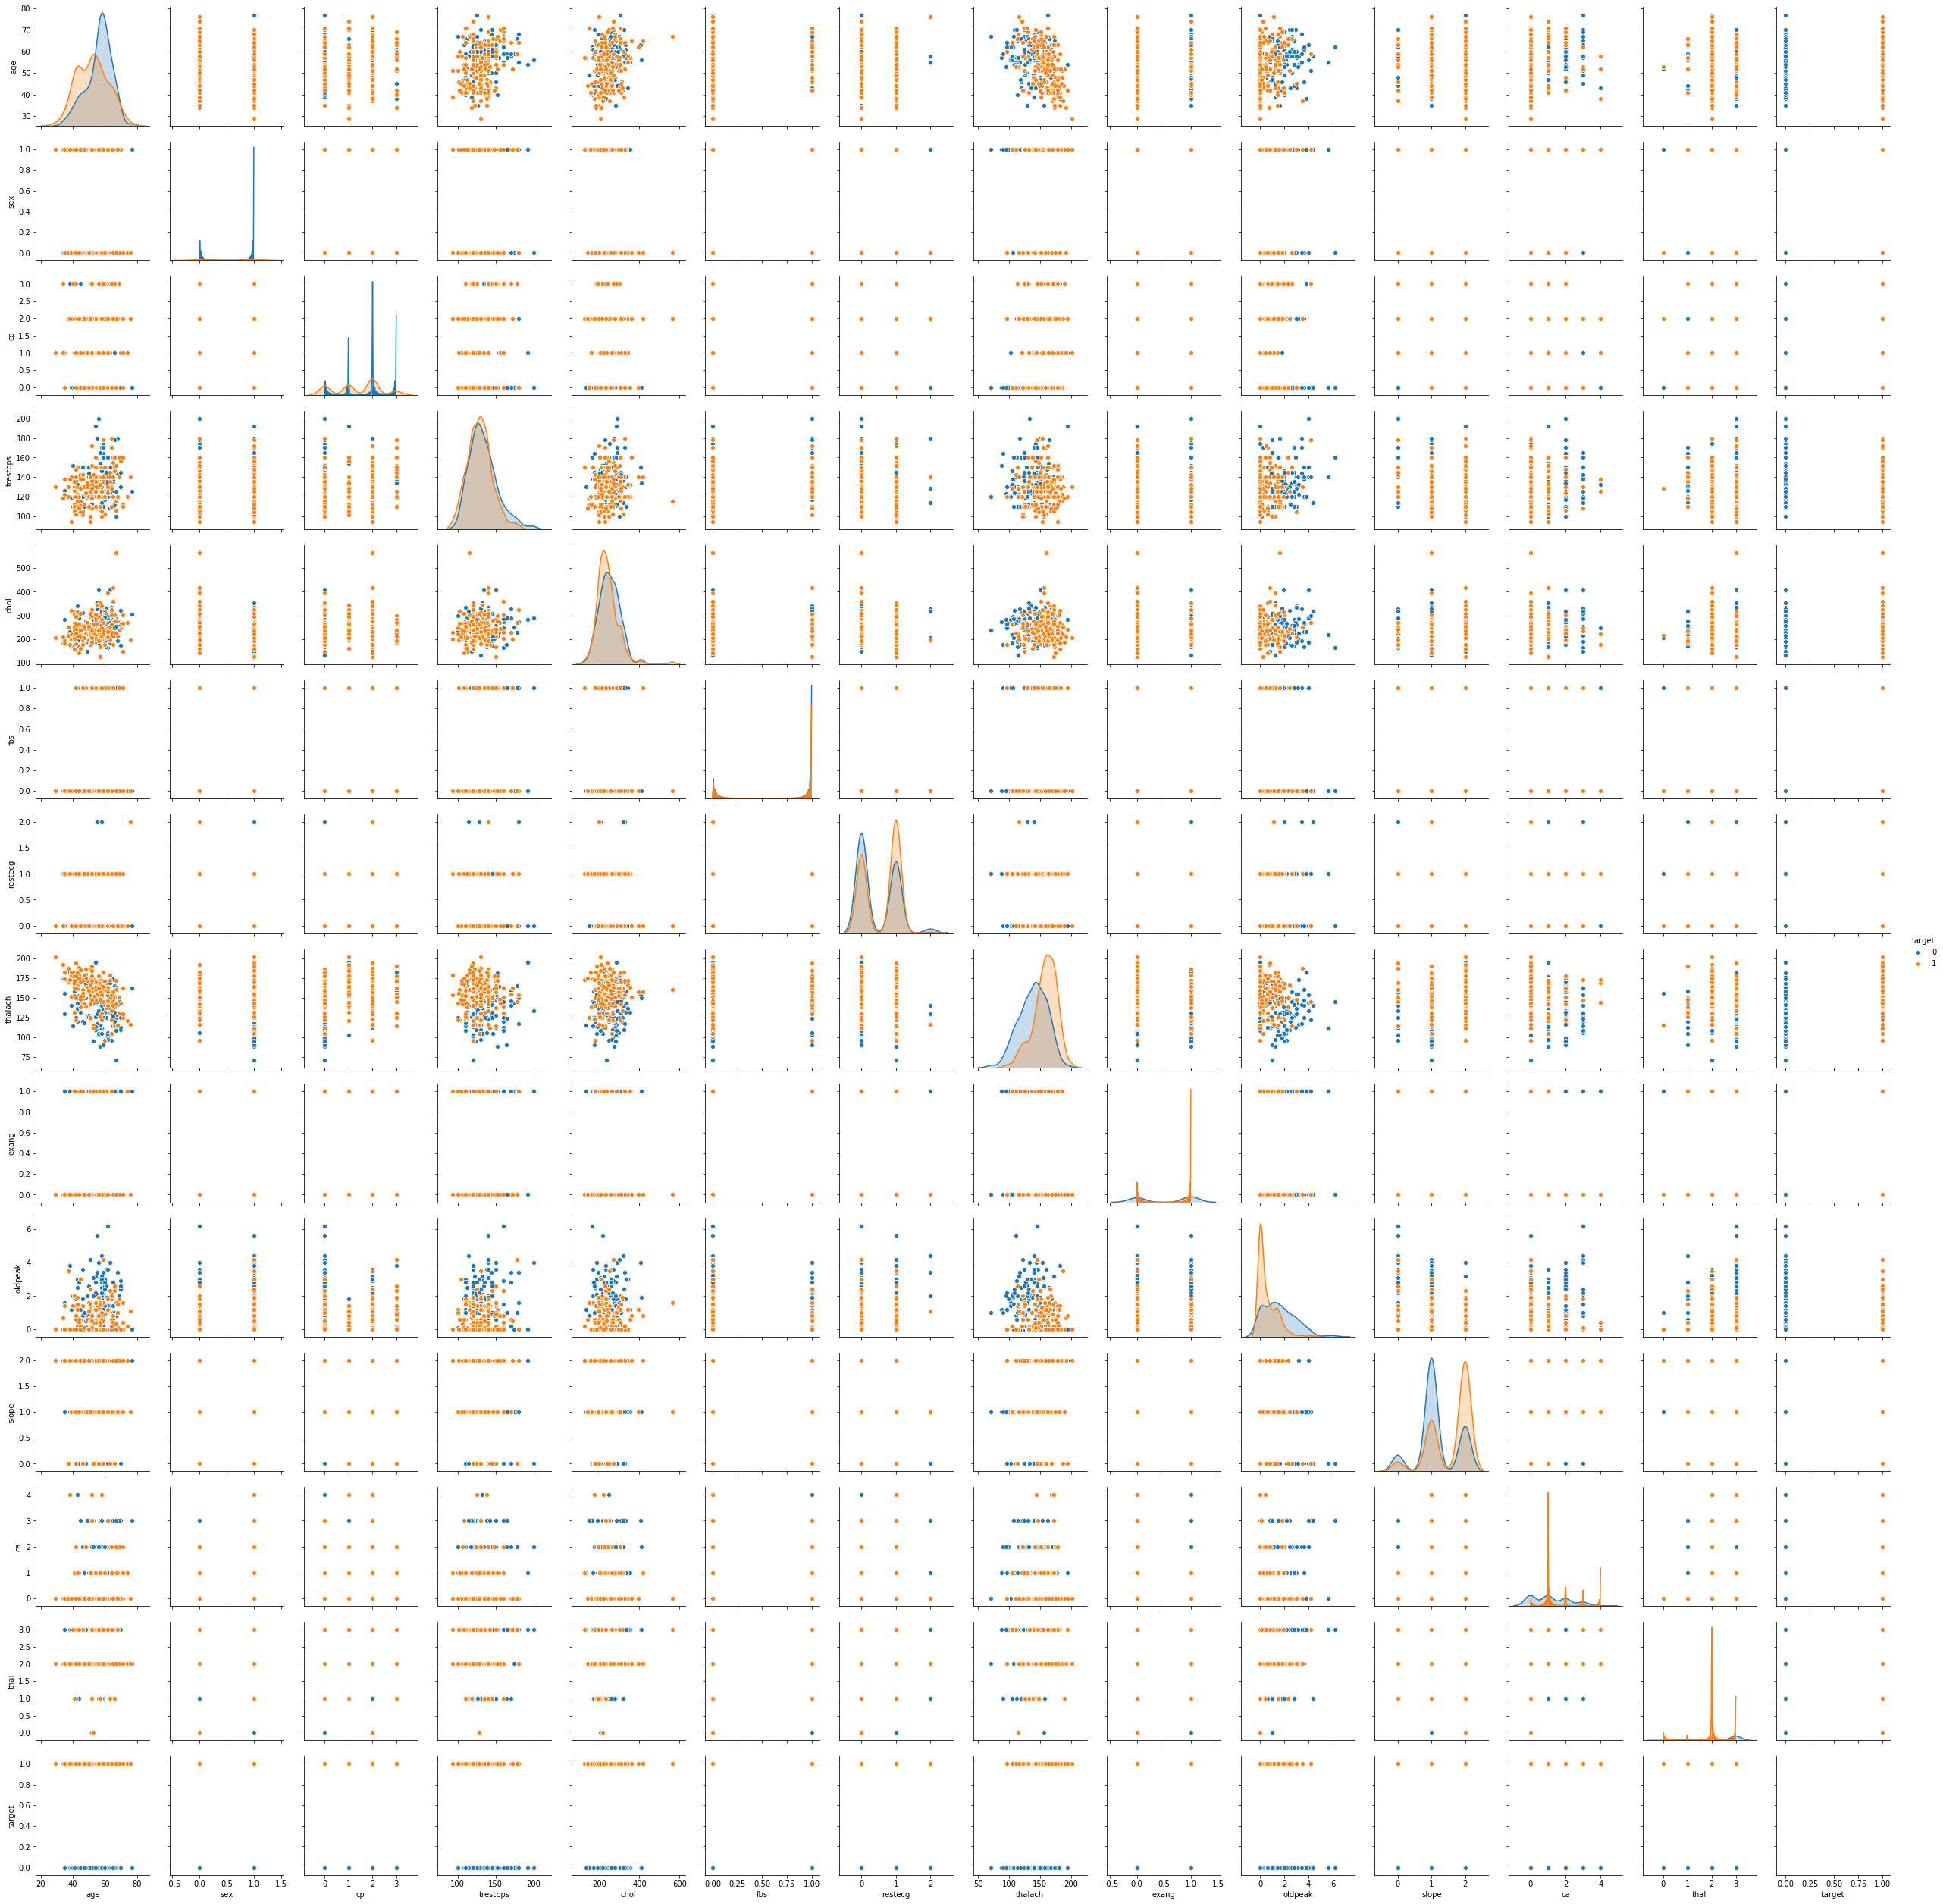

In [11]:
# Pairplot for the data
sns.pairplot(data=df,hue='target')

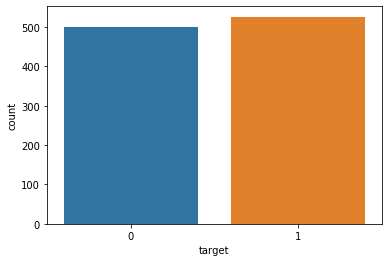

In [12]:
# plotting the countplot for the count of people with heart disease and not
sns.countplot(x='target',data=df)

In [13]:
print(df['target'].value_counts())

1    526
0    499
Name: target, dtype: int64


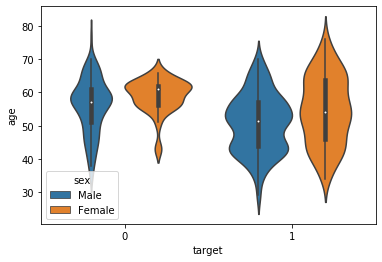

In [14]:
# Violin plot for relation between target and age 
r=[] 
for i in dat['sex']:
    if i==1:
        r.append('Male')
    else:
        r.append('Female')
dat['sex']=pd.Series(r)

sns.violinplot(x='target',y='age',data=dat,hue='sex')

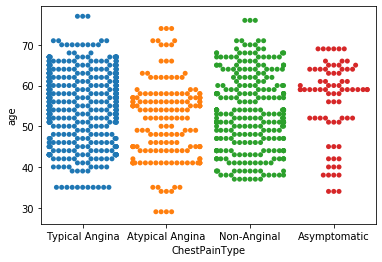

In [15]:
# Swarmplot for the relation between Chest pain type and age 
t=[]
for i in dat['cp']:
    if i == 0:
        t.append('Typical Angina')
    if i ==1:
        t.append('Atypical Angina')
    if i ==2:
        t.append('Non-Anginal')
    if i==3:
        t.append('Asymptomatic')
        
dat['ChestPainType']=pd.Series(t)

sns.swarmplot(x='ChestPainType', y='age', data=dat)

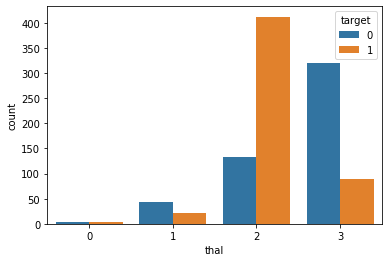

In [16]:
sns.countplot(x='thal',data=df, hue='target')

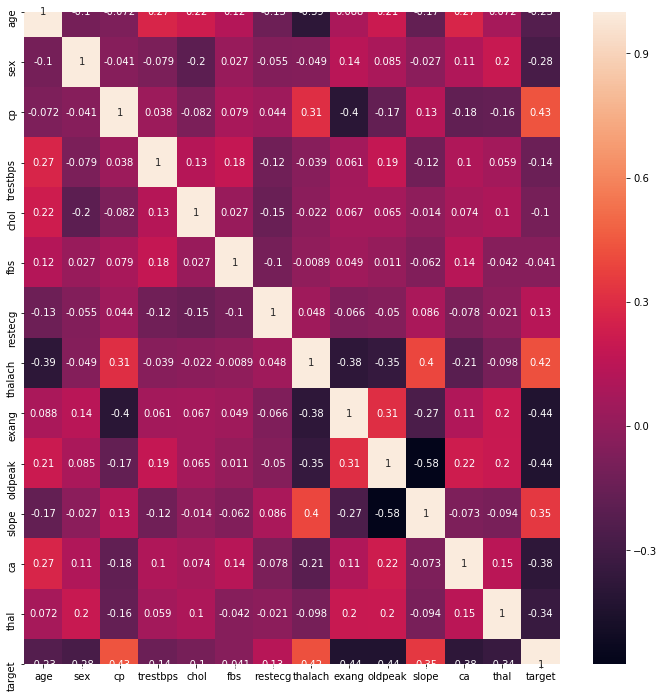

In [17]:
# Heatmap for the data
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

## Making the Model

In [18]:
# Fitting the model in k nearest neighbors classifier and trying to get the best quantity of neighbors
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score as AS
from sklearn.model_selection import cross_val_score as cvs
ut=[]
acc=[]
for i in range(1,100,1):
    model =  KNN(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = AS(y_test,y_pred)
    ut.append([accuracy,i])
    acc.append(accuracy)
print(max(ut))

[1.0, 1]


In [19]:
# So n_neighbors = 1
regressor = KNN(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [22]:
print(cm)

[[ 98   0]
 [  0 107]]


In [23]:
# Classification Report for KNN where nearest neighbors >5
from sklearn.metrics import classification_report as CR
print(CR(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



### Accuracy Chart

Text(0, 0.5, 'Accuracy')

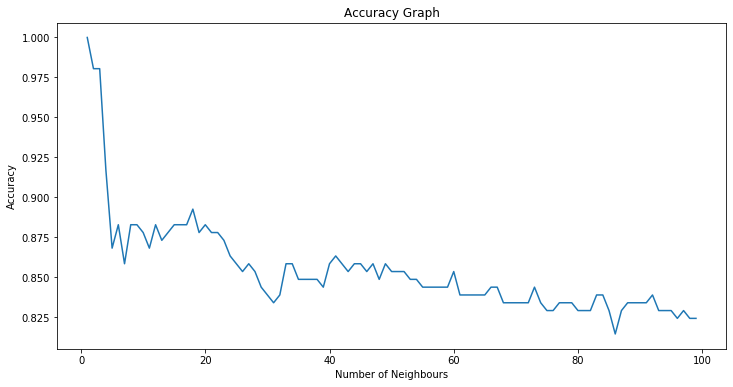

In [24]:
l = list(range(1,100))
m = acc
plt.figure(figsize=(12,6))
plt.plot(l,m)
plt.title('Accuracy Graph')
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")

#### Name: Sahil Harjai